In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
COLORS = ['r', 'b', 'g','c','m','y','k','orange']

In [4]:
CLUSTER_DATA = np.loadtxt("cluster.dat").T

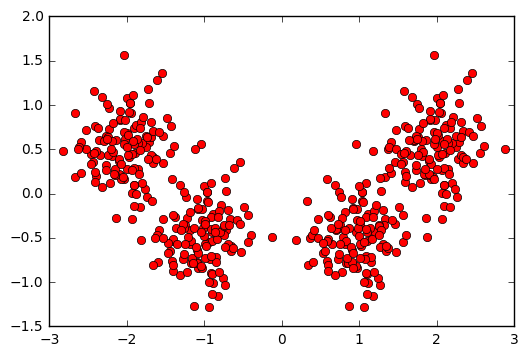

In [5]:
plt.plot(CLUSTER_DATA[:, 0], CLUSTER_DATA[:,1], 'ro')

# 1. K-Means

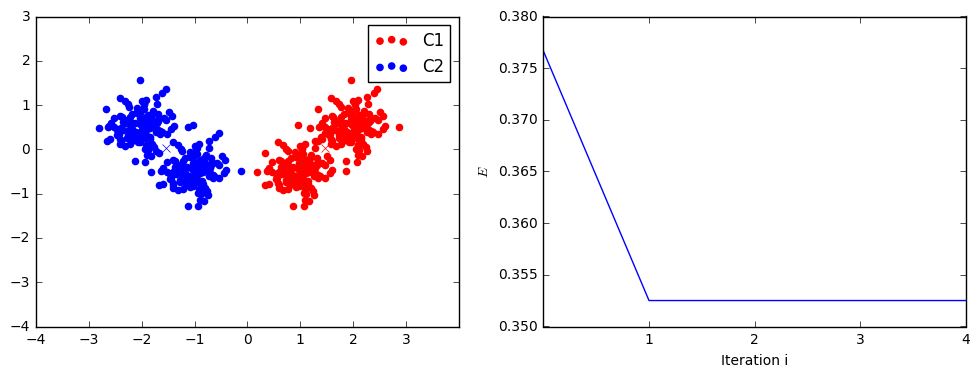

In [6]:
def kmean(k=2, t_max = 2):
    cost = []
    means = np.mean(CLUSTER_DATA, axis=0)
    centroids = np.random.multivariate_normal(means, np.eye(2),k) # k x 2
    for t in range(t_max):
        points_in_centroid = [ list() for i in range(k) ]
        for i in range(CLUSTER_DATA.shape[0]):
            p = CLUSTER_DATA[i,:]
            distance = np.sum(np.power(centroids - p, 2), axis=1)
            closest_centroid = np.argmin(distance)
            points_in_centroid[closest_centroid].append(i)
     

        new_centroids = list(map( lambda c: np.mean( CLUSTER_DATA[c,:], axis=0), points_in_centroid ))
        new_centroids = np.array(new_centroids)
        
        cluster_cost = [0]*k
        for c in range(k):
            points = points_in_centroid[c]
            if len(points) == 0:
                new_centroids[c,:] = centroids[c,:]
            else:
                cluster_cost[c] =  np.sum(np.sum(np.power(CLUSTER_DATA[points] - new_centroids[c,:],2), axis=1))
        
        centroids = new_centroids
        cost.append(np.sum(cluster_cost)/(2.0*CLUSTER_DATA.shape[0]))
      
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    for c in range(len(points_in_centroid)):
        points = points_in_centroid[c]
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])

        plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1) )
    plt.legend()
    plt.xticks(range(-4,4,1))
    plt.yticks(range(-4,4,1))
    
    plt.subplot(1,2,2)
    plt.plot(cost)
    plt.xticks(range(1,t_max))
    plt.ylabel("$E$")
    plt.xlabel("Iteration i")
kmean(k=2, t_max=5)

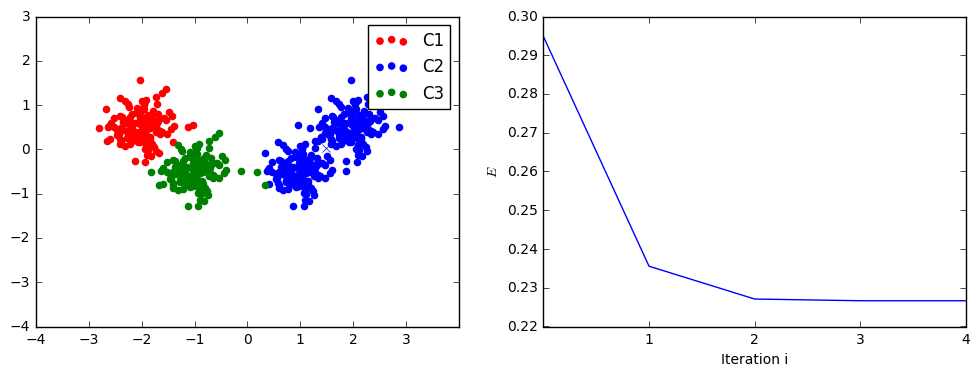

In [7]:
kmean(k=3, t_max=5)

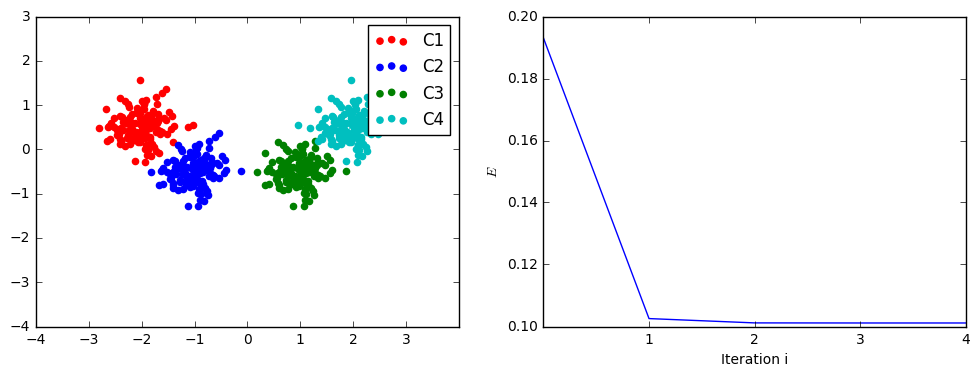

In [8]:
kmean(k=4, t_max=5)

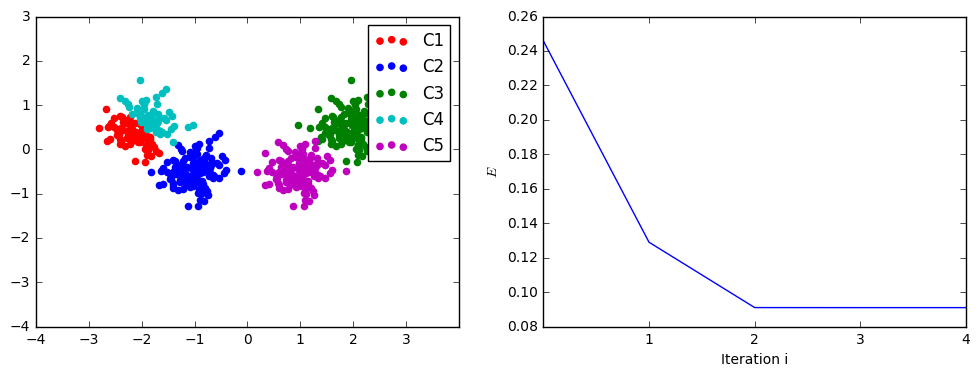

In [9]:
kmean(k=5, t_max=5)

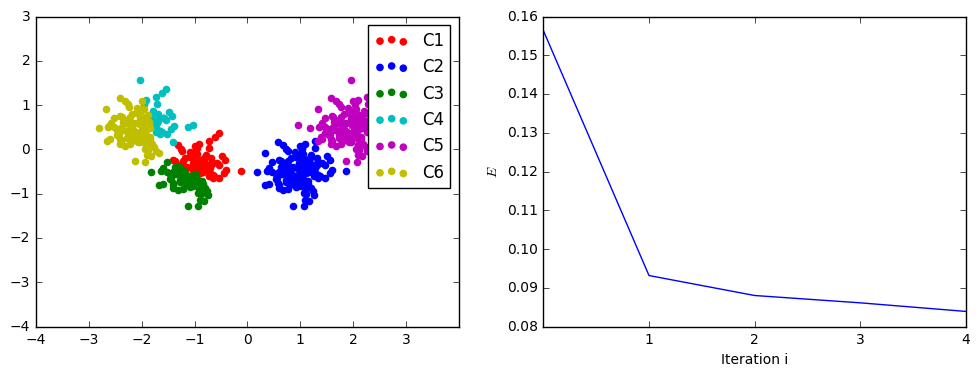

In [10]:
kmean(k=6, t_max=5)

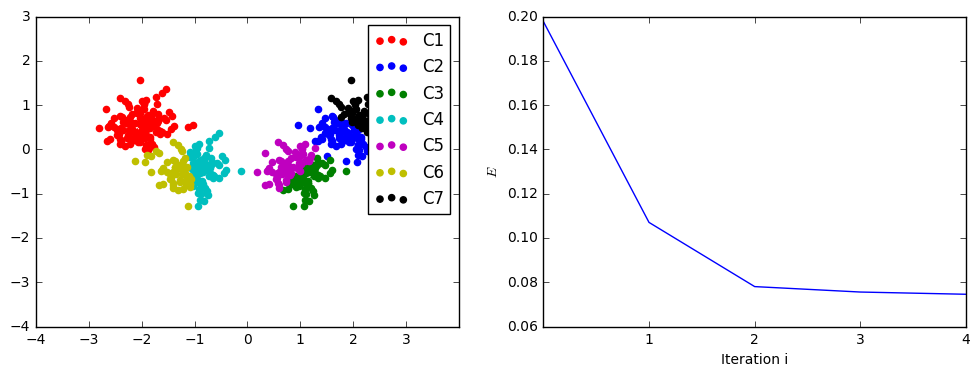

In [11]:
kmean(k=7, t_max=5)

/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


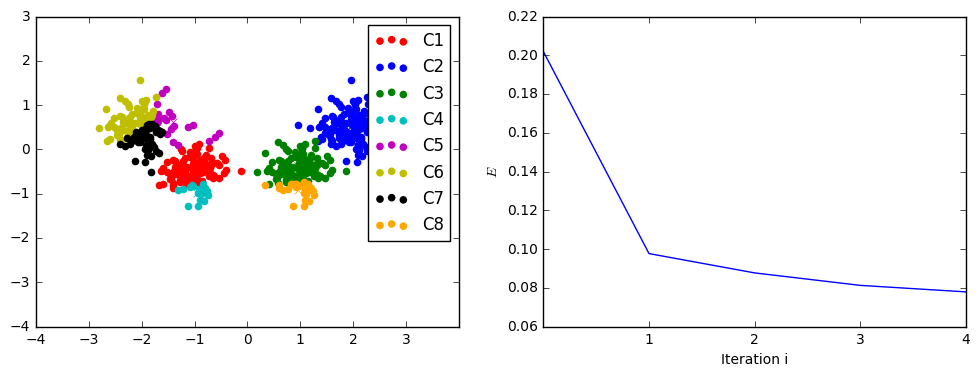

In [12]:
kmean(k=8, t_max=5)

# 2. Online K-Means

In [13]:
def plot_cluster_and_centroids(clusters, centroids):
    for c in range(len(clusters)):
        points = clusters[c]
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])
        plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1) )

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


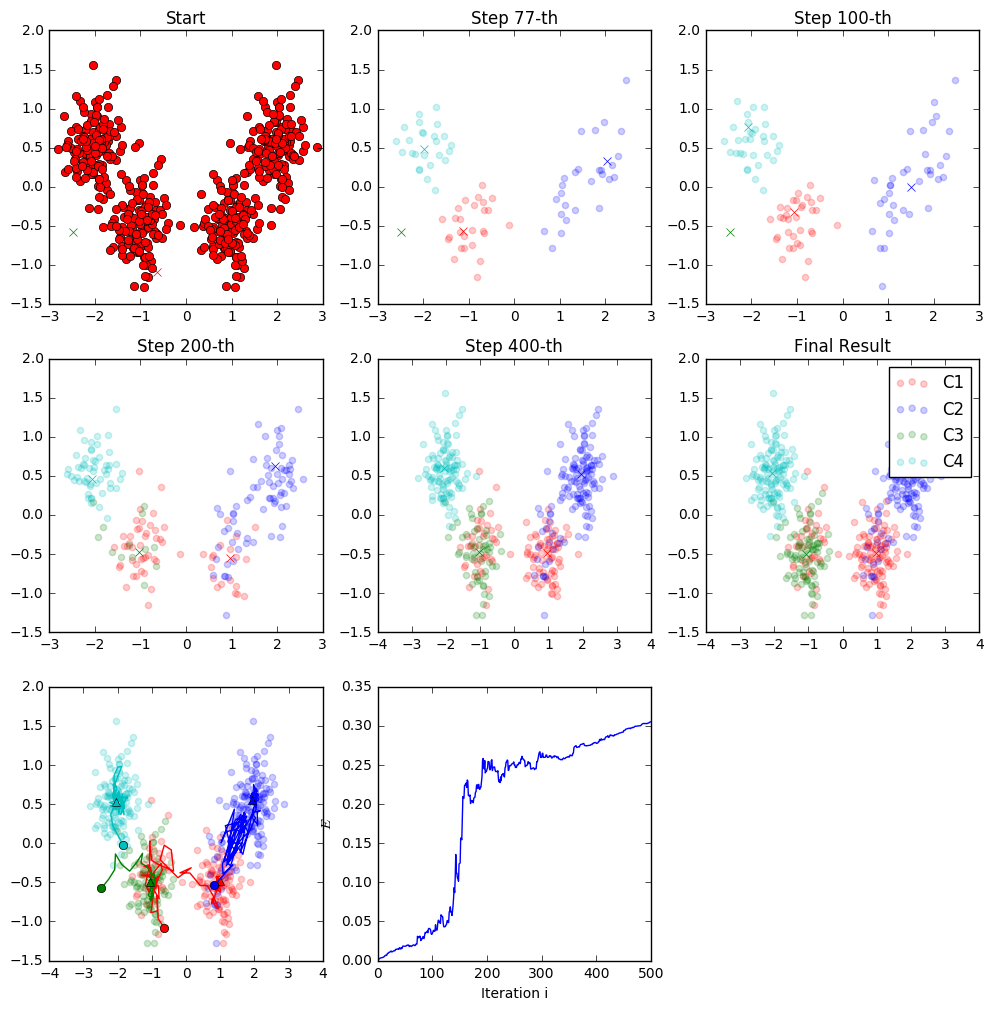

In [14]:
def online_kmean(k=4, t_max = CLUSTER_DATA.shape[0], eta=0.4, tau=0.99):
    cost = []
    means = np.mean(CLUSTER_DATA, axis=0)
    centroids = np.random.multivariate_normal(means, np.eye(2),k) # k x 2
    
    plt.figure(figsize=(12,12))
    count = 1
    plt.subplot(3,3, count)
    count += 1
    for c in range(len(centroids)):
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])
    plt.plot(CLUSTER_DATA[:, 0], CLUSTER_DATA[:,1], 'ro')
    plt.title("Start")
    plt.legend()
    
    points_in_centroid = [ list() for i in range(k) ]

    movements = [ [np.copy(centroids[i])] for i in range(k) ]
    
    for i in range(t_max):

        p = CLUSTER_DATA[i,:]
        distance = np.sum(np.power(centroids - p, 2), axis=1)
        closest_centroid = np.argmin(distance)
        points_in_centroid[closest_centroid].append(i)

        delta = centroids[closest_centroid] - p

        centroids[closest_centroid] -= eta*delta
        
        movements[closest_centroid].append(np.copy(centroids[closest_centroid]))
        
        if i > int(t_max / 4.0):
            eta = tau*eta
            
        if i in [77,100,200,400]:
            plt.subplot(3,3,count)
            for c in range(len(points_in_centroid)):
                points = points_in_centroid[c]
                plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])

                plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1), alpha = 0.2 )
            plt.title('Step %d-th' % (i))
            count = count + 1
        cluster_cost = [0]*k
        for c in range(k):
            points = points_in_centroid[c]
            if len(points) == 0:
                pass
            else:
                cluster_cost[c] =  np.sum(np.sum(np.power(CLUSTER_DATA[points] - centroids[c,:],2), axis=1))
        
        cost.append(np.sum(cluster_cost)/(2.0*CLUSTER_DATA.shape[0]))
      
    plt.subplot(3,3, count)
    for c in range(len(points_in_centroid)):
        points = points_in_centroid[c]
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])

        plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1), alpha=0.2 )
    plt.legend()
    plt.title('Final Result')
    count = count + 1
    
    plt.subplot(3,3, count)
    for c in range(k):
        trajectory = np.array(movements[c])
        plt.plot(trajectory[:,0], trajectory[:,1], color= COLORS[c])
        
        plt.plot(trajectory[0,0], trajectory[0,1], color= COLORS[c], marker='o')
        plt.plot(trajectory[-1,0], trajectory[-1,1], color= COLORS[c], marker='^')
        
        points = points_in_centroid[c]
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])

        plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1), alpha=0.2 )
    count = count + 1
    
    plt.subplot(3,3, count)
    plt.plot(cost)
    plt.ylabel("$E$")
    plt.xlabel("Iteration i")
online_kmean(k=4)

In [15]:
means = np.mean(CLUSTER_DATA, axis=0)
start_centroids = np.random.multivariate_normal(means, np.eye(2),8) 

#  Q.3 Soft Kmean

In [57]:
def plot_start(k):
    plt.plot(start_centroids[:k,0], start_centroids[:k,1], 'r^')
    plt.scatter(CLUSTER_DATA[:,0], CLUSTER_DATA[:,1], alpha=0.2)
    plt.title('Start')
    
def plot_points_cluster_color(centroids, mq):
    
    alpha = np.max(mq, axis=1) / np.sum(mq, axis=1)
    for i in range(centroids.shape[0]):
        plt.plot(centroids[i,0], centroids[i,1], '^', color=COLORS[i], label="C%d"%i)
    for p in range(CLUSTER_DATA.shape[0]):
        cluster_idx = np.argmax(mq[p,:])
        point = CLUSTER_DATA[p,:]
        plt.plot(point[0], point[1], 'o', color=COLORS[cluster_idx], alpha=alpha[p])
        
    plt.legend()

Iter : 10
Iter : 20


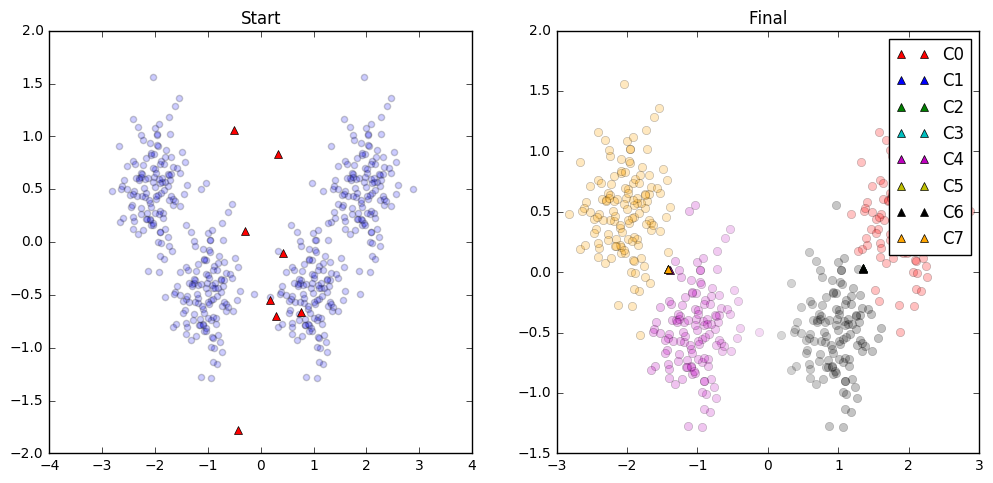

In [59]:
def soft_kmeans(k=8, beta=0.8, tau=1, gamma=0.01, show_plot = False):
    centroids = start_centroids[:k,:]

    converged = False
    iteration = 1

    if show_plot:
        count = 1
        plt.figure(figsize=(12,12))
        plt.subplot(2,2,count)
        plot_start(k)

        count += 1
    
    mq = np.zeros((CLUSTER_DATA.shape[0], k))

    while not converged:
        for i in range(CLUSTER_DATA.shape[0]):
            delta =  centroids - CLUSTER_DATA[i,:]
            dtc   = np.power( np.linalg.norm(delta, axis=1), 2 )

            mq[i,:] = np.exp( -beta*0.5*dtc )
            mq[i,:] /= np.sum(mq[i,:])

        mq = mq / np.sum(mq, axis=0)


        new_centroids = np.dot(mq.T, CLUSTER_DATA)

        beta = tau*beta
        diff = np.linalg.norm(new_centroids-centroids, axis=1)
        if np.all(diff < gamma):
            break
        centroids = new_centroids
        if show_plot:
            print('Iter : %d' % iteration) if iteration % 10 == 0 else None
        iteration += 1
    
    if show_plot:
        plt.subplot(2,2,count)
        
        plot_points_cluster_color(centroids, mq)

        plt.title('Final')
        plt.legend()
        count += 1
    return centroids, mq
_ = soft_kmeans(k=8, show_plot=True)

In [61]:
BETAS = np.arange(0.2,20.2, 0.2)

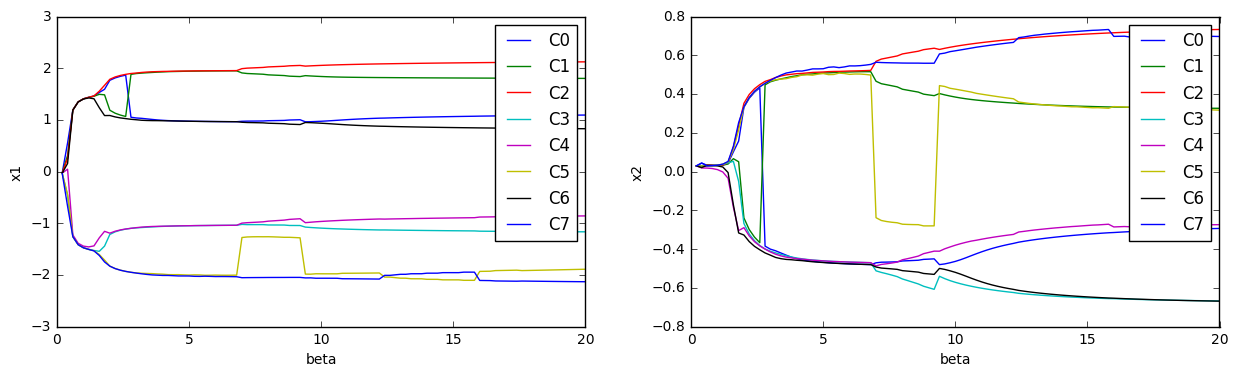

In [62]:
def plot_centroids_coordinate(k, data, axis):
    for j in range(k):
        plt.plot(BETAS, data[:,j,axis], label='C%d'%j)
    plt.ylabel('x%d'%(axis+1))
    plt.xlabel('beta')
    plt.legend()

def plot_with_betas(k=8):

    values = np.zeros((BETAS.shape[0], k, 2))
    
    for i in range(BETAS.shape[0]):
        b = BETAS[i]
        values[i,:,:], _ = soft_kmeans(k=k, beta=b)
 
    
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plot_centroids_coordinate(k, values, axis=0)
    
    plt.subplot(1,2,2)
    plot_centroids_coordinate(k, values, axis=1)

    
plot_with_betas()

In [63]:
K = [2,4,6,8]

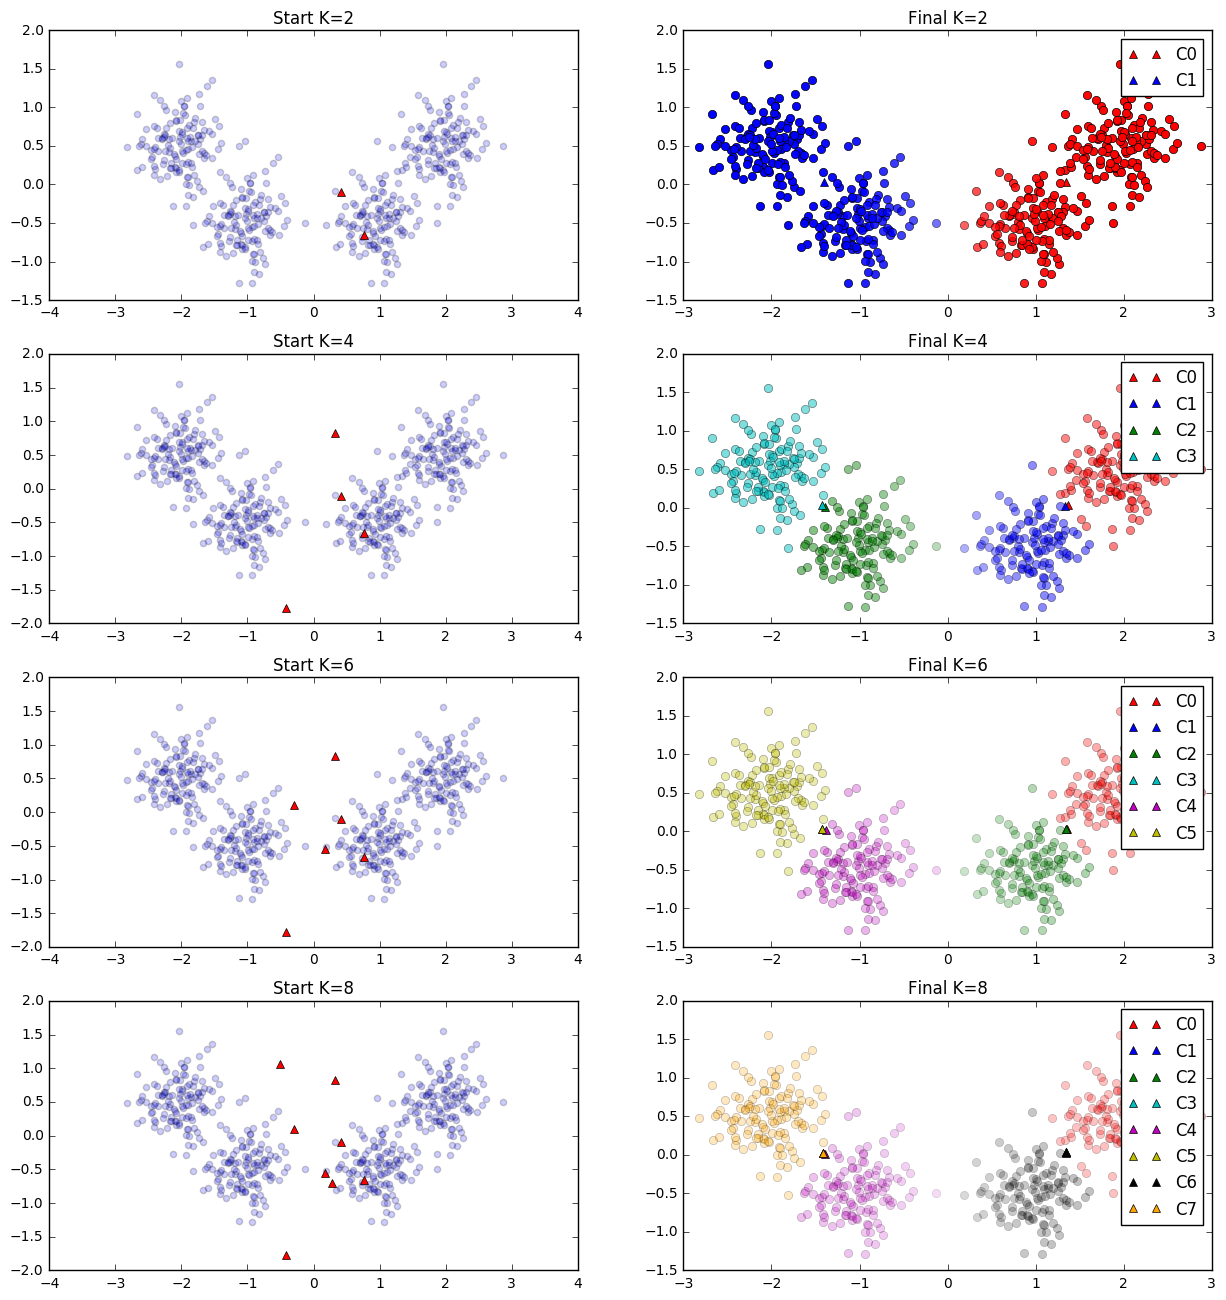

In [64]:
count = 1
plt.figure(figsize=(15,16))
for k in K:
    cc,mq = soft_kmeans(k=k)
    plt.subplot(4,2,count)
    plot_start(k)
    plt.title('Start K=%d' % k)
    count +=1
    
    plt.subplot(4,2,count)
    plot_points_cluster_color(cc, mq)
    plt.title('Final K=%d' % k)
    count +=1

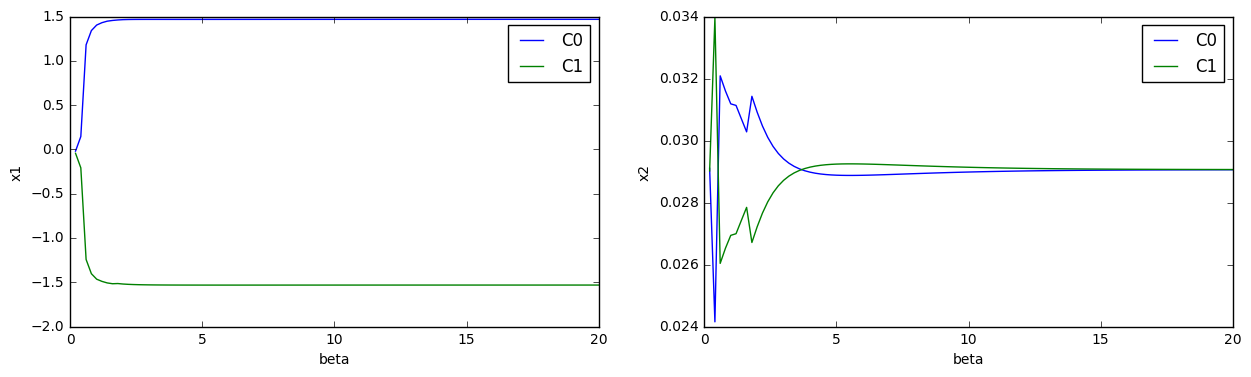

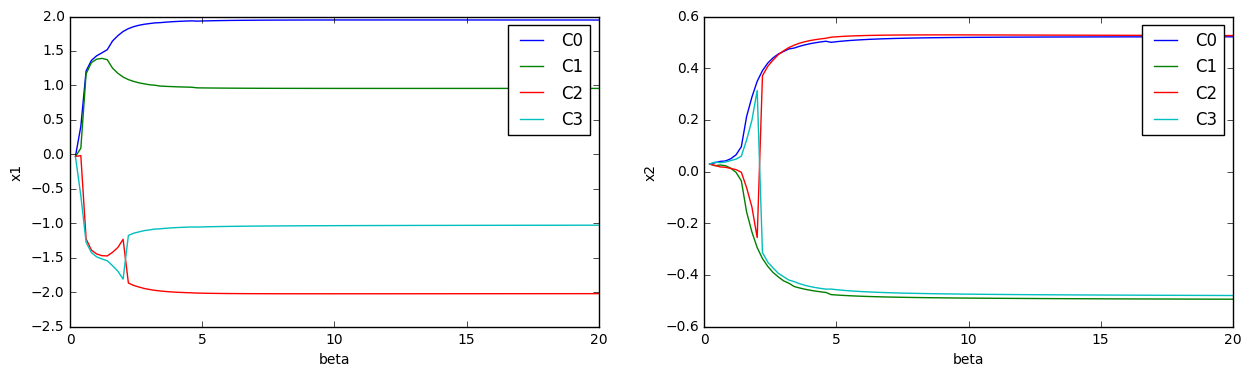

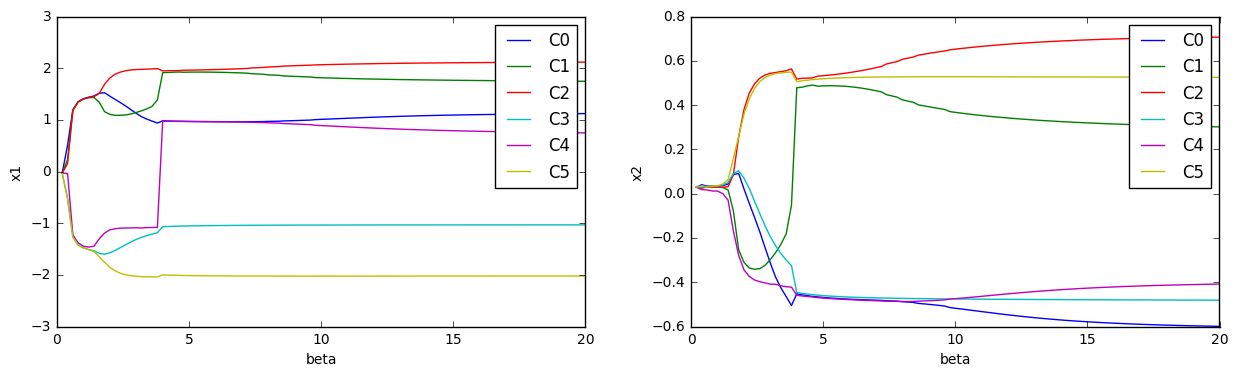

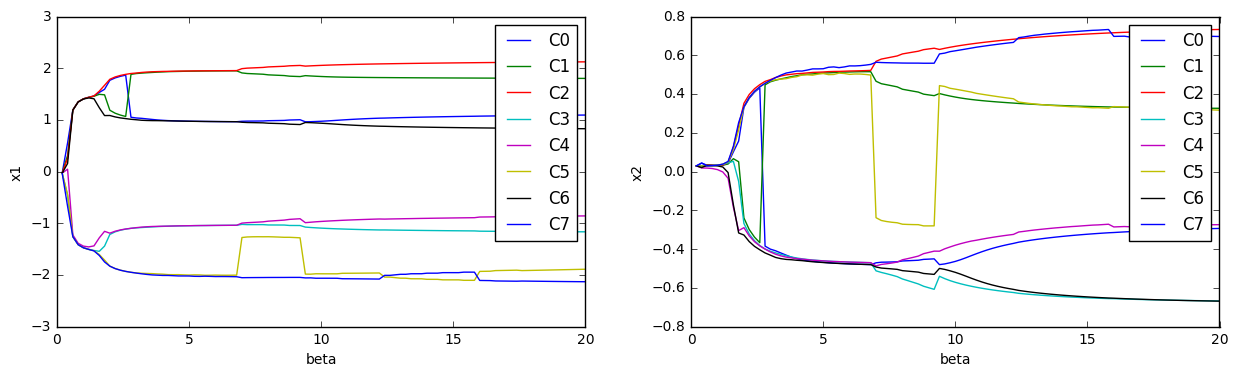

In [65]:
for k in K:
    plot_with_betas(k)

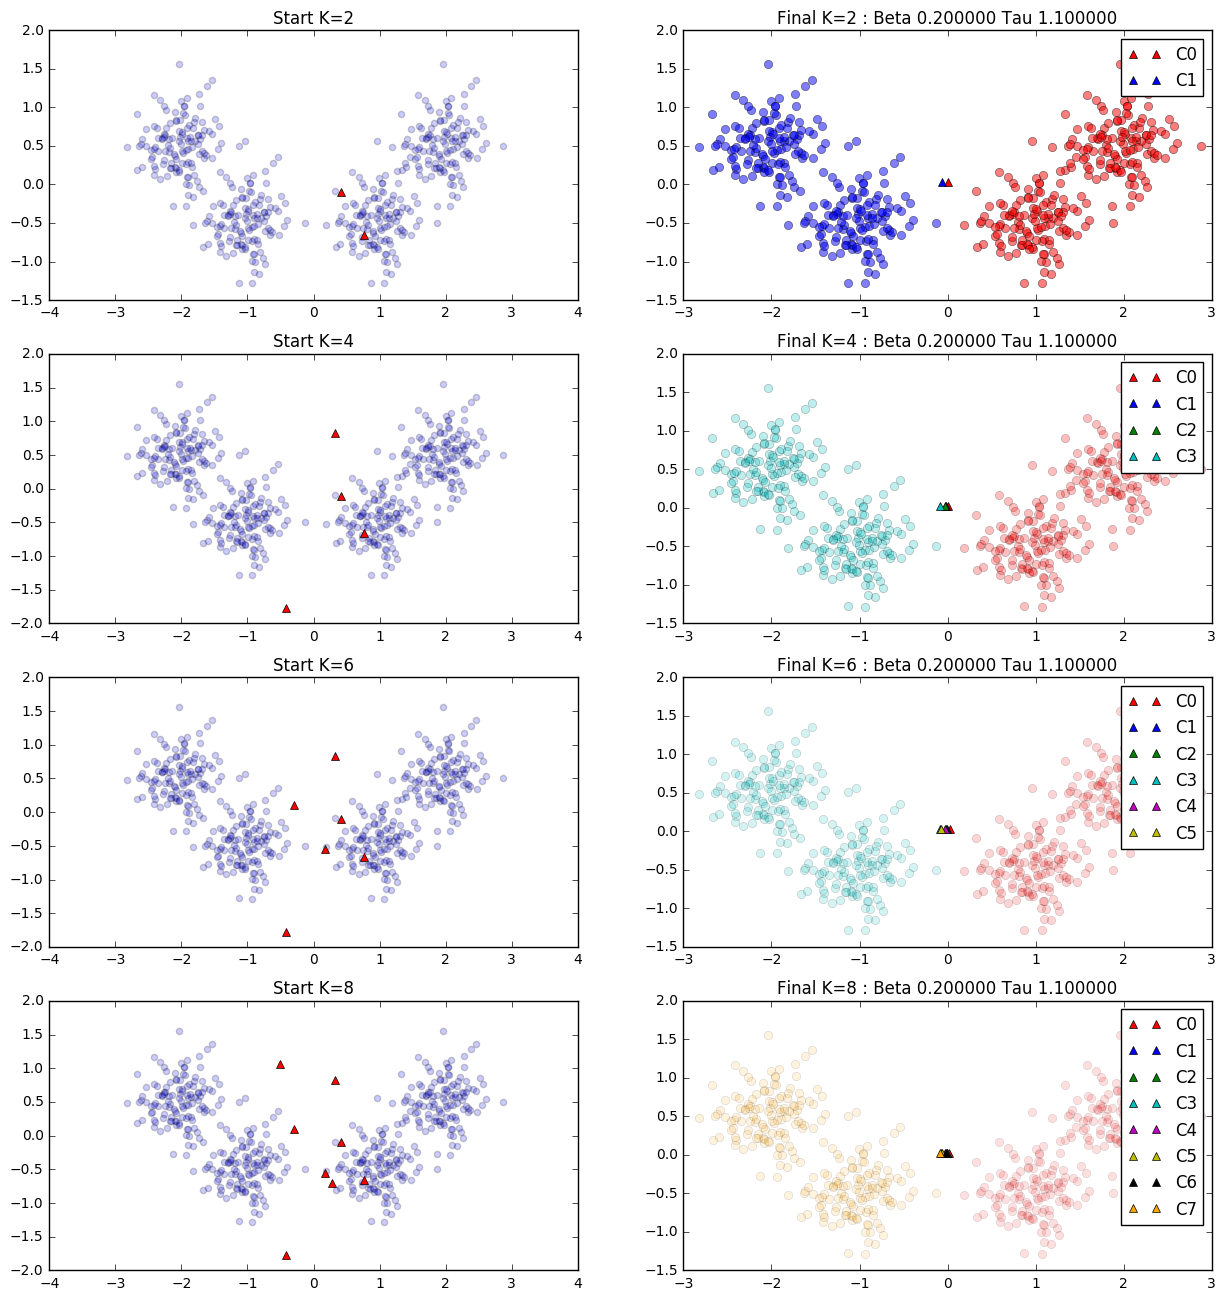

In [66]:
count = 1
plt.figure(figsize=(15,16))

for k in K:
    cc,mq = soft_kmeans(k=k, tau=1.1, beta=0.2)
    plt.subplot(4,2,count)
    plot_start(k)
    plt.title('Start K=%d' % k)
    count +=1
    
    plt.subplot(4,2,count)
    plot_points_cluster_color(cc, mq)
    plt.title('Final K=%d : Beta %f Tau %f' % (k, 0.2, 1.1))
    count +=1

# Interpret result
When annealing $\beta$ with $\tau=1.1$, we found that the points were assigned with lower probablity, they are lighter in the plot. Also, the controids converge to the origin, which is quite different from unannealling version where they are distributed across the data.